In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/home/fran/airbnb-malaga'

In [3]:
#listing = pd.read_csv('http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2022-09-28/data/listings.csv.gz')
#calendar= pd.read_csv('http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2022-09-28/data/calendar.csv.gz')
#reviews=pd.read_csv('http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2022-09-28/data/reviews.csv.gz')
#neighbourhoods= pd.read_csv("http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2022-09-28/visualisations/neighbourhoods.csv")
wd ="/home/fran/airbnb-malaga/"
listing =pd.read_csv(wd+"listings.csv.gz")
calendar= pd.read_csv(wd+"calendar.csv.gz")
reviews=pd.read_csv(wd+"reviews.csv.gz")
neighbourhoods= pd.read_csv(wd+"neighbourhoods.csvighbourhoods.csv")

In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8481 non-null   int64  
 1   listing_url                                   8481 non-null   object 
 2   scrape_id                                     8481 non-null   int64  
 3   last_scraped                                  8481 non-null   object 
 4   source                                        8481 non-null   object 
 5   name                                          8481 non-null   object 
 6   description                                   8468 non-null   object 
 7   neighborhood_overview                         4401 non-null   object 
 8   picture_url                                   8481 non-null   object 
 9   host_id                                       8481 non-null   i

In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095565 entries, 0 to 3095564
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 165.3+ MB


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283187 entries, 0 to 283186
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     283187 non-null  int64 
 1   id             283187 non-null  int64 
 2   date           283187 non-null  object
 3   reviewer_id    283187 non-null  int64 
 4   reviewer_name  283187 non-null  object
 5   comments       283179 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.0+ MB


In [7]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,96033,8152056,2013-10-18,366364,Vera,My stay at the apartment of Adriana and Rafa w...
1,96033,8689156,2013-11-12,4862098,Sarah,The flat was perfect for our holiday in Malaga...
2,96033,11275860,2014-03-27,12189558,Andrea,The reservation was canceled 8 days before arr...
3,96033,11862773,2014-04-17,2236416,Galina,El piso esta muy lindo y comido :) No había in...
4,96033,12689717,2014-05-08,13440727,Patricia,We had some trouble finding the appartment at ...


In [8]:
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Bailen-Miraflores
1,NaN,Campanillas
2,NaN,Carretera de Cadiz
3,NaN,Centro
4,NaN,Churriana


In [9]:
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        11 non-null     object 
dtypes: float64(1), object(1)
memory usage: 304.0+ bytes


In [10]:
listing["bathrooms_text"]

0                 1 bath
1         2 shared baths
2       1.5 shared baths
3                2 baths
4       1.5 shared baths
              ...       
8476             2 baths
8477              1 bath
8478              1 bath
8479              1 bath
8480             3 baths
Name: bathrooms_text, Length: 8481, dtype: object

In [11]:
listing["bathrooms"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8476   NaN
8477   NaN
8478   NaN
8479   NaN
8480   NaN
Name: bathrooms, Length: 8481, dtype: float64

In [12]:
listing["price"]

0        $54.00
1        $21.00
2        $39.00
3       $191.00
4        $48.00
         ...   
8476    $265.00
8477     $31.00
8478     $90.00
8479    $112.00
8480    $125.00
Name: price, Length: 8481, dtype: object

In [13]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,96033,2022-09-29,f,$55.00,$55.00,4,1125
1,96033,2022-09-30,f,$55.00,$55.00,4,1125
2,96033,2022-10-01,f,$55.00,$55.00,4,1125
3,96033,2022-10-02,f,$55.00,$55.00,4,1125
4,96033,2022-10-03,f,$55.00,$55.00,4,1125


In [14]:
calendar.query("listing_id== 96033 & available == 'f'")

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,96033,2022-09-29,f,$55.00,$55.00,4,1125
1,96033,2022-09-30,f,$55.00,$55.00,4,1125
2,96033,2022-10-01,f,$55.00,$55.00,4,1125
3,96033,2022-10-02,f,$55.00,$55.00,4,1125
4,96033,2022-10-03,f,$55.00,$55.00,4,1125
5,96033,2022-10-04,f,$55.00,$55.00,4,1125
10,96033,2022-10-09,f,$58.00,$58.00,4,1125
11,96033,2022-10-10,f,$53.00,$53.00,4,1125
12,96033,2022-10-11,f,$51.00,$51.00,4,1125
13,96033,2022-10-12,f,$55.00,$55.00,4,1125


In [15]:
listing["listing_url"].value_counts()

https://www.airbnb.com/rooms/96033                 1
https://www.airbnb.com/rooms/599231092946287209    1
https://www.airbnb.com/rooms/600514726516770010    1
https://www.airbnb.com/rooms/600488438385932275    1
https://www.airbnb.com/rooms/600464306180666664    1
                                                  ..
https://www.airbnb.com/rooms/38213631              1
https://www.airbnb.com/rooms/38206988              1
https://www.airbnb.com/rooms/38201574              1
https://www.airbnb.com/rooms/38201546              1
https://www.airbnb.com/rooms/33469519              1
Name: listing_url, Length: 8481, dtype: int64

In [16]:
calendar.date.describe()

count        3095565
unique           365
top       2022-09-29
freq            8481
Name: date, dtype: object

In [17]:
calendar["date_timestamp"]=pd.to_datetime(calendar["date"])

In [18]:
calendar["date_timestamp"].describe(datetime_is_numeric=True)

count                          3095565
mean     2023-03-29 23:59:59.999999744
min                2022-09-29 00:00:00
25%                2022-12-29 00:00:00
50%                2023-03-30 00:00:00
75%                2023-06-29 00:00:00
max                2023-09-28 00:00:00
Name: date_timestamp, dtype: object

In [19]:
#Checking that there are 31,30 or 28 occurrences for every month 
start_date, end_date = '2022-10-01', '2023-08-31'
calendar[["date","date_timestamp","listing_id"]].\
query('date >= @start_date and date <= @end_date').\
groupby([calendar.date_timestamp.dt.year,calendar.date_timestamp.dt.month,"listing_id"]).\
count()["date"].value_counts()

31    59367
30    25443
28     8481
Name: date, dtype: int64

In [20]:
#Checking that there are booked days in the future also
calendar.pivot_table(index=[calendar.date_timestamp.dt.year,calendar.date_timestamp.dt.month], columns=['available'],values=['listing_id'],aggfunc='count')

listing_id        
available                              f       t
date_timestamp date_timestamp                   
2022           9                   13350    3612
               10                 147813  115098
               11                  96144  158286
               12                  92556  170355
2023           1                  111973  150938
               2                  104019  133449
               3                  114463  148448
               4                  127976  126454
               5                  126007  136904
               6                  123202  131228
               7                  133462  129449
               8                  135252  127659
               9                  120504  116964

In [21]:
#TODO
#Calculate two columns: Gains and potential gains. Supposing that when a listing is no available, it is earning money
#Describe the type of accomodation offered (mayber per neighbourhood?)

<AxesSubplot:xlabel='room_type', ylabel='Percent'>

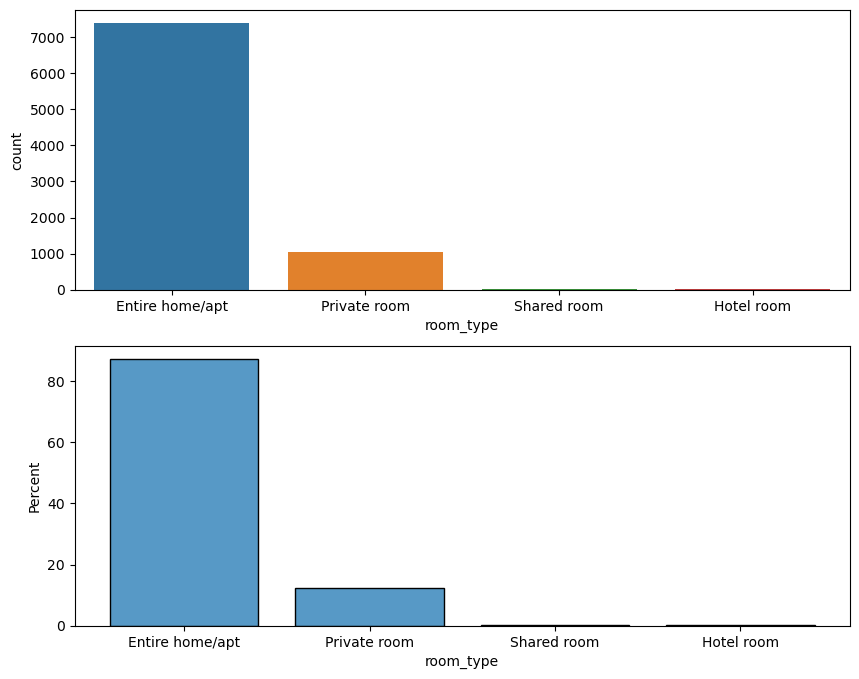

In [22]:
#Room type. Count and percentage
plt.figure(1,figsize=(10,8))
plt.subplot(211)
sns.countplot(data=listing,x="room_type")
plt.subplot(212)
sns.histplot(data=listing,x="room_type",stat="percent", shrink =0.8)
#Add annotation?

In [23]:
room_types = pd.DataFrame(\
                          {"count":listing["room_type"].value_counts(),\
                           "percentage": listing["room_type"].value_counts(normalize=True)*100}\
                          )
room_types

,count,percentage
Entire home/apt,7390,87.135951
Private room,1054,12.427780
Shared room,21,0.247612
Hotel room,16,0.188657


In [24]:
#Listings per host

In [25]:
listings_per_host= listing[["host_id","id"]].\
                                            groupby("host_id").agg("count").\
                                            sort_values(by='id',ascending=False).\
                                            rename(columns={"id": "listing_count"})
listings_per_host

,listing_count
host_id,
80225433,162
63293666,149
115528688,102
5890675,98
317065206,83
...,...
92599053,1
92613704,1
92652828,1


<AxesSubplot:xlabel='listing_count', ylabel='Count'>

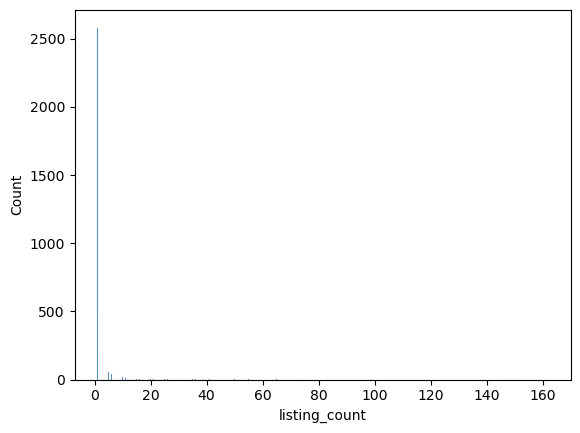

In [26]:
sns.histplot(data=listings_per_host, x= "listing_count")

In [27]:
#df[cum_percent] = 100 * (df[‘column_name’].cumsum()/df[‘column_name’].sum()) 
listings_per_host_freq =pd.DataFrame({"frequency":listings_per_host.value_counts()})
listings_per_host_freq["percent"]= listings_per_host_freq["frequency"]/(listings_per_host_freq["frequency"].sum())*100
listings_per_host_freq["cum_percent"] = 100 * (listings_per_host_freq["frequency"].cumsum()/listings_per_host_freq["frequency"].sum()) 
listings_per_host_freq.query("cum_percent < 98")


,frequency,percent,cum_percent
listing_count,,,
1,2581,70.770496,70.770496
2,489,13.408281,84.178777
3,191,5.237181,89.415958
4,112,3.071017,92.486976
5,57,1.562928,94.049904
6,41,1.124212,95.174116
7,33,0.904853,96.078969
8,23,0.630655,96.709624
10,17,0.466137,97.175761


In [28]:
#98% of hosts have 11 listings or less

In [29]:
##Pie chart¿?

In [30]:
#####################3

In [31]:
#Obtain number of bathrooms and if they are shared

In [32]:
listing["bathrooms_text"].head()

0              1 bath
1      2 shared baths
2    1.5 shared baths
3             2 baths
4    1.5 shared baths
Name: bathrooms_text, dtype: object

In [33]:
listing["nb_bathrooms"]=pd.to_numeric(listing["bathrooms_text"].str.extract("^(\d+\.?\d*)\s",expand= False))
listing["nb_bathrooms"]

0       1.0
1       2.0
2       1.5
3       2.0
4       1.5
       ... 
8476    2.0
8477    1.0
8478    1.0
8479    1.0
8480    3.0
Name: nb_bathrooms, Length: 8481, dtype: float64

In [34]:
listing["bathroom_is_shared"]= listing["bathrooms_text"].str.contains("shared")
listing["bathroom_is_shared"]

0       False
1        True
2        True
3       False
4        True
        ...  
8476    False
8477    False
8478    False
8479    False
8480    False
Name: bathroom_is_shared, Length: 8481, dtype: object

In [35]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8481 non-null   int64  
 1   listing_url                                   8481 non-null   object 
 2   scrape_id                                     8481 non-null   int64  
 3   last_scraped                                  8481 non-null   object 
 4   source                                        8481 non-null   object 
 5   name                                          8481 non-null   object 
 6   description                                   8468 non-null   object 
 7   neighborhood_overview                         4401 non-null   object 
 8   picture_url                                   8481 non-null   object 
 9   host_id                                       8481 non-null   i

<AxesSubplot:xlabel='bathroom_is_shared', ylabel='review_scores_rating'>

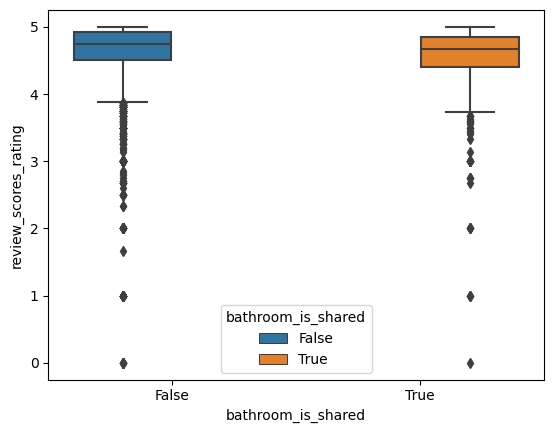

In [36]:
sns.boxplot(data=listing, y="review_scores_rating", x= "bathroom_is_shared", hue= "bathroom_is_shared")

<AxesSubplot:xlabel='review_scores_rating', ylabel='Percent'>

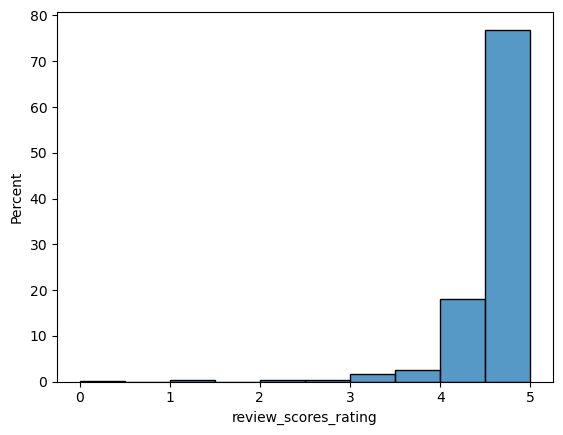

In [37]:
sns.histplot(data=listing, x="review_scores_rating", bins=10, stat ="percent")

In [38]:
##According to listing, almost all the places are rated between 4 and 5 stars.
#Check the review dataframe

In [39]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283187 entries, 0 to 283186
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     283187 non-null  int64 
 1   id             283187 non-null  int64 
 2   date           283187 non-null  object
 3   reviewer_id    283187 non-null  int64 
 4   reviewer_name  283187 non-null  object
 5   comments       283179 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.0+ MB


In [40]:
reviews["comments"]

0         My stay at the apartment of Adriana and Rafa w...
1         The flat was perfect for our holiday in Malaga...
2         The reservation was canceled 8 days before arr...
3         El piso esta muy lindo y comido :) No había in...
4         We had some trouble finding the appartment at ...
                                ...                        
283182    Все соответсвует описанию. Расположение отличн...
283183                                                 Bien
283184    Recomiendo elegir esta estancia siendo conscie...
283185    I was looking for a place close to Malaga airp...
283186    Great location. Apartment reflects pictures. V...
Name: comments, Length: 283187, dtype: object

In [41]:
#It is not possible to match

In [42]:
#To see how sucessful is a place.
#1) Number of nights already booked
#2) Number of reviews

In [43]:
reviews_per_listing = reviews[["listing_id","id"]].\
                                                    groupby("listing_id").\
                                                    count().\
                                                    rename(columns={"id":"reviews_per_listing"}).\
                                                    sort_values(by="reviews_per_listing", ascending= False).\
                                                    reset_index()
reviews_per_listing

,listing_id,reviews_per_listing
0,10802138,741
1,2343063,720
2,2336145,627
3,30141259,586
4,18369830,506
...,...,...
7259,576658091225693763,1
7260,578222781238635203,1
7261,579484204761152692,1
7262,579556109687702640,1


<AxesSubplot:xlabel='reviews_per_listing', ylabel='Percent'>

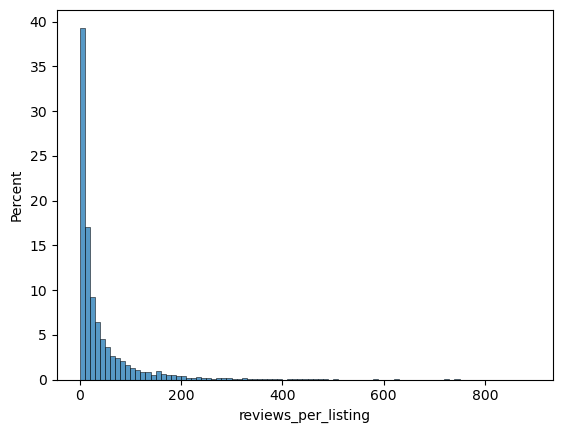

In [44]:
sns.histplot(data=reviews_per_listing,x="reviews_per_listing",bins=np.arange(0,900,10),stat='percent')

In [45]:
#Check that listing id is unique (to avoid strange things when joining). Unnecesary due to group by
reviews_per_listing.index.to_series().duplicated().value_counts()

False    7264
dtype: int64

In [46]:
listing.merge(right=reviews_per_listing, how="left", left_on="id", right_on="listing_id")

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,nb_bathrooms,bathroom_is_shared,listing_id,reviews_per_listing
0,96033,https://www.airbnb.com/rooms/96033,20220928234716,2022-09-29,city scrape,"* Cosy flat 200m from the beach, El Palo/Malaga *",Bonito piso de 2 dormitorios a 200m de la play...,"A 200 metros de las playas de El Palo, antiguo...",https://a0.muscache.com/pictures/32780788/e487...,510467,...,f,1,1,0,0,1.41,1.0,False,96033.0,154.0
1,166473,https://www.airbnb.com/rooms/166473,20220928234716,2022-09-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,...,f,4,0,4,0,0.63,2.0,True,166473.0,85.0
2,212845,https://www.airbnb.com/rooms/212845,20220928234716,2022-09-29,city scrape,BEAUTIFUL DOUBLE ROOM IN MALAGA,"Beautifull double room with toilet, in Malaga...",NaN,https://a0.muscache.com/pictures/d4a19330-03c4...,617998,...,f,2,0,1,1,0.31,1.5,True,212845.0,40.0
3,229511,https://www.airbnb.com/rooms/229511,20220928234716,2022-09-29,city scrape,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,Country house in rural Provencal style.<br /><...,"Country house next to Natural park, just 25 m...",https://a0.muscache.com/pictures/2102051/2743a...,1198693,...,f,2,2,0,0,0.06,2.0,False,229511.0,4.0
4,330760,https://www.airbnb.com/rooms/330760,20220928234716,2022-09-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,...,t,3,1,2,0,0.36,1.5,True,330760.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,50352276,https://www.airbnb.com/rooms/50352276,20220928234716,2022-09-29,previous scrape,"Paz, vistas y exclusividad a 5 minutos de la p...","Mi casa es preciosa, es un ático en una zona m...",La Cala del Moral está ubicada a 15 minutos de...,https://a0.muscache.com/pictures/a8ef0ed8-e57f...,406660535,...,t,1,1,0,0,NaN,2.0,False,NaN,NaN
8477,32705544,https://www.airbnb.com/rooms/32705544,20220928234716,2022-09-29,previous scrape,Precioso Estudio al Lado Del Mar,Adorable estudio bien decorado con todo lo nec...,Playamar está a sólo diez minutos a pie del ce...,https://a0.muscache.com/pictures/6073ccb6-3346...,925118,...,t,6,6,0,0,2.02,1.0,False,32705544.0,87.0
8478,33294303,https://www.airbnb.com/rooms/33294303,20220928234716,2022-09-29,previous scrape,LUXURY PLAYAMAR BEACH II,Disfruta de este magnifico apartamento junto a...,"Ubicación perfecta, pues dispone de la tranqui...",https://a0.muscache.com/pictures/eabafaab-ed76...,72237248,...,t,4,4,0,0,0.41,1.0,False,33294303.0,17.0
8479,50607554,https://www.airbnb.com/rooms/50607554,20220928234716,2022-09-29,previous scrape,Brisa Torremolinos,Studio-apartment for 4 people at 100 meters fr...,"At the Costa del Sol, surrounded by good resta...",https://a0.muscache.com/pictures/prohost-api/H...,183280723,...,f,3,3,0,0,0.10,1.0,False,50607554.0,1.0


In [47]:
listing[["reviews_per_month","nb_bathrooms"]].corr()

,reviews_per_month,nb_bathrooms
reviews_per_month,1.000000,-0.083938
nb_bathrooms,-0.083938,1.000000


In [48]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095565 entries, 0 to 3095564
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            object        
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  int64         
 6   maximum_nights  int64         
 7   date_timestamp  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 188.9+ MB


In [49]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,date_timestamp
0,96033,2022-09-29,f,$55.00,$55.00,4,1125,2022-09-29
1,96033,2022-09-30,f,$55.00,$55.00,4,1125,2022-09-30
2,96033,2022-10-01,f,$55.00,$55.00,4,1125,2022-10-01
3,96033,2022-10-02,f,$55.00,$55.00,4,1125,2022-10-02
4,96033,2022-10-03,f,$55.00,$55.00,4,1125,2022-10-03


In [50]:
def dollars_to_numeric (ser):
    removed_sp_char = ser.str.extract(pat="\$(.*)",expand=False)
    return pd.to_numeric(removed_sp_char, errors="coerce")

In [51]:
calendar = calendar.assign(numeric_adj_price= dollars_to_numeric(calendar.adjusted_price))

In [59]:
already_booked=calendar[["listing_id","available","numeric_adj_price"]].query("available == 'f'").groupby("listing_id").agg(\
                                                                                                                       avg_adj_price=pd.NamedAgg(column="numeric_adj_price", aggfunc="mean"),\
                                                                                                                       booked_nights=pd.NamedAgg(column="available", aggfunc="count")\
                                                                                                                      ).sort_values(by="booked_nights", ascending= False)\
                                                                                                                    .reset_index()

In [60]:
already_booked

,listing_id,avg_adj_price,booked_nights
0,34571853,65.0,365
1,31299790,98.0,365
2,14864397,60.0,365
3,39188866,35.0,365
4,50386953,200.0,365
...,...,...,...
8216,33769894,90.0,1
8217,620262434808268200,43.0,1
8218,49583135,106.0,1
8219,700387795036281853,124.0,1


In [54]:
##Cruzar booked nights con reviews y ver si tienen correlacion (y con puntuación)

In [67]:
listing_ext=(listing.merge(right=already_booked,how="left",left_on=["id"], right_on="listing_id" ))

In [69]:
listing_ext[["review_scores_value","reviews_per_month", "booked_nights"]].corr()

,review_scores_value,reviews_per_month,booked_nights
review_scores_value,1.000000,0.136229,0.053781
reviews_per_month,0.136229,1.000000,0.000936
booked_nights,0.053781,0.000936,1.000000


In [ ]:
#Parece que no tiene mucha correlación

In [63]:
calendar.head()
listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,nb_bathrooms,bathroom_is_shared
0,96033,https://www.airbnb.com/rooms/96033,20220928234716,2022-09-29,city scrape,"* Cosy flat 200m from the beach, El Palo/Malaga *",Bonito piso de 2 dormitorios a 200m de la play...,"A 200 metros de las playas de El Palo, antiguo...",https://a0.muscache.com/pictures/32780788/e487...,510467,...,4.61,VFT/MA/22043,f,1,1,0,0,1.41,1.0,False
1,166473,https://www.airbnb.com/rooms/166473,20220928234716,2022-09-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,...,4.67,CTC/2018118027,f,4,0,4,0,0.63,2.0,True
2,212845,https://www.airbnb.com/rooms/212845,20220928234716,2022-09-29,city scrape,BEAUTIFUL DOUBLE ROOM IN MALAGA,"Beautifull double room with toilet, in Malaga...",NaN,https://a0.muscache.com/pictures/d4a19330-03c4...,617998,...,4.74,VFT/MA/09354,f,2,0,1,1,0.31,1.5,True
3,229511,https://www.airbnb.com/rooms/229511,20220928234716,2022-09-29,city scrape,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,Country house in rural Provencal style.<br /><...,"Country house next to Natural park, just 25 m...",https://a0.muscache.com/pictures/2102051/2743a...,1198693,...,5.00,VFT/ MA/22170,f,2,2,0,0,0.06,2.0,False
4,330760,https://www.airbnb.com/rooms/330760,20220928234716,2022-09-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,...,4.50,VFT/MA/12240,t,3,1,2,0,0.36,1.5,True


In [56]:
cana

NameError: name 'cana' is not defined

In [ ]:
calendar.available